In [20]:
from utils import (adstock, s_curve, create_transformed_tables, 
                   plot_stacked_area_with_actual, plot_transformed_vs_raw, 
                   plot_data_set, plot_actual_fitted_residuals, plot_response_curve)
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [ ]:

# Load CSVs as dataframes

df_data = pd.read_csv('Data/df_data.csv', index_col=0, parse_dates=True)
df_trans = pd.read_csv('Data/df_trans.csv', index_col=0, parse_dates=True)
df_trans_norm = pd.read_csv('Data/df_trans_norm.csv', index_col=0, parse_dates=True)
df_values = pd.read_csv('Data/df_values.csv', index_col=0, parse_dates=True)
df_var_spec = pd.read_csv('Data/df_var_spec.csv', index_col=0)

df_trans2 = pd.read_csv('Data/df_trans2.csv', index_col=0, parse_dates=True)
df_trans_norm2 = pd.read_csv('Data/df_trans_norm2.csv', index_col=0, parse_dates=True)
df_values2 = pd.read_csv('Data/df_values2.csv', index_col=0, parse_dates=True)
df_var_spec2 = pd.read_csv('Data/df_var_spec2.csv', index_col=0)


# print(df_var_spec)
# df_data.head(), df_trans.head(), df_values.head()

In [2]:
X = df_trans_norm.copy()
# Remove columns not needed (if any)
X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary(title="model1"))
print("Model overall standard error:", round(np.sqrt(model.scale),3))

                                    model1                                    
Dep. Variable:                 actual   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     344.0
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           1.26e-84
Time:                        15:03:33   Log-Likelihood:                 15.136
No. Observations:                 156   AIC:                            -16.27
Df Residuals:                     149   BIC:                             5.076
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               10.2354      0.272     37.697   

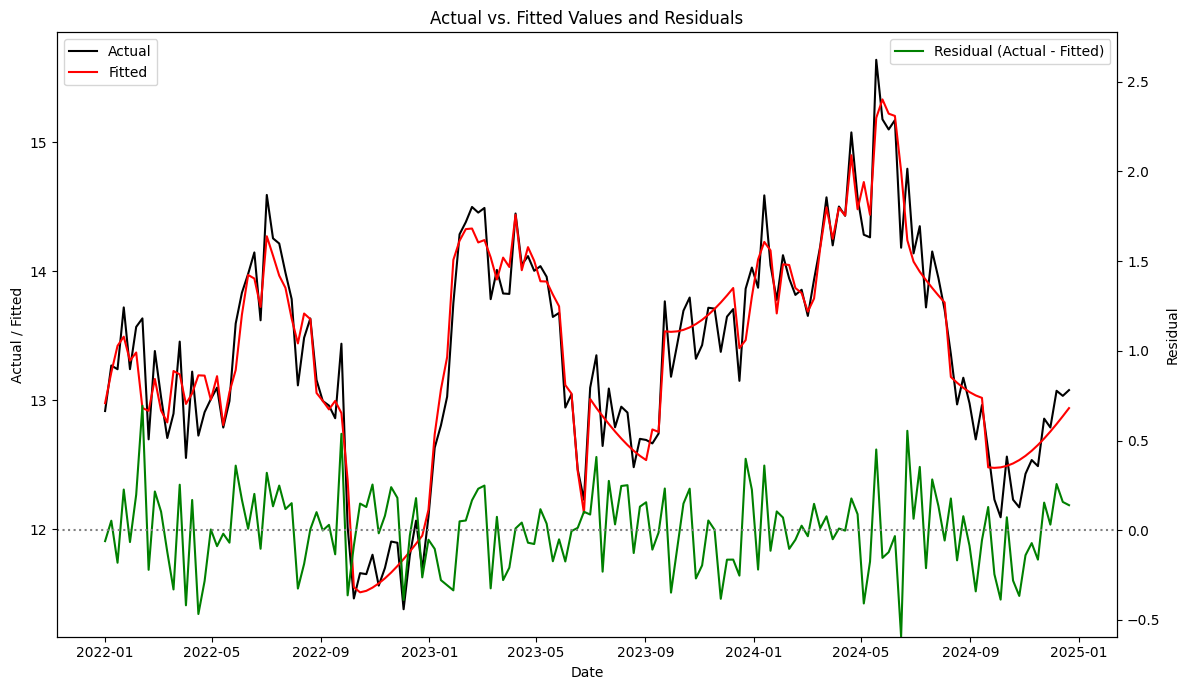

In [3]:
plot_actual_fitted_residuals(model,df_values['actual'])

In [22]:
# Get carryover value for media1 from df_var_spec
carryover_media1 = df_var_spec.loc[df_var_spec['variable'] == 'media1', 'carryover'].values[0]

# Create adstocked media1 variable as a pandas Series in df_data
media1_adstock_array = adstock(df_data['media1'].values, carryover_media1)
df_data['media1_adstock'] = pd.Series(media1_adstock_array, index=df_data.index)
media1_adstock = df_data['media1_adstock']


if 1==0:
    # Plot: raw media1 as bars (wider), adstocked media1 as a line
    plt.figure(figsize=(12, 6))
    plt.bar(df_data.index, df_data['media1'], label='Grps', color='red', width=3)
    plt.plot(df_data.index, df_data['media1_adstock'], label='Adstock', color='blue', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Raw (Bar) vs. Adstocked (Line) media1')
    plt.legend()
    plt.tight_layout()
    plt.show()


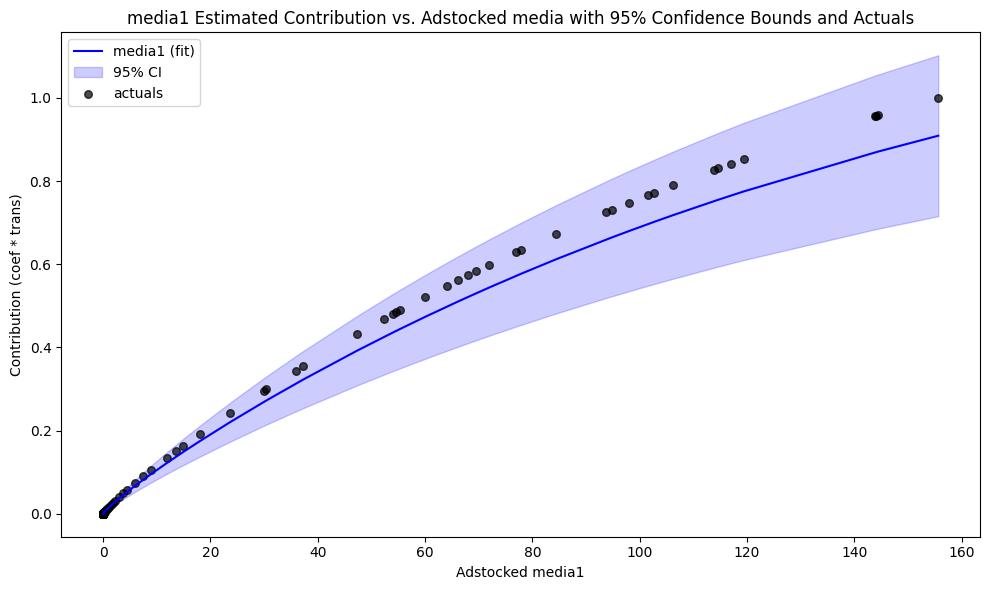

In [5]:
plot_response_curve(model,'media1', media1_adstock,df_trans_norm['media1'], df_values['media1'])

In [23]:
## regress model2
X = df_trans_norm2.copy()
# Remove columns not needed (if any)
X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()

# Print summary
print(model2.summary(title="model2"))
print("Model overall standard error:", round(np.sqrt(model2.scale),3))

                                    model2                                    
Dep. Variable:                 actual   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     338.1
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           4.20e-84
Time:                        15:08:24   Log-Likelihood:                 13.872
No. Observations:                 156   AIC:                            -13.74
Df Residuals:                     149   BIC:                             7.606
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               10.2730      0.273     37.676   

Switch linear media1 in model2 to model1 and regress


In [24]:

X = df_trans_norm.copy()
X['media1']= df_trans_norm2['media1']  # Switch linear media1 in model2 to model1

X = X[[col for col in X.columns if col != 'actual' and col != 'error']]
y = df_values['actual']

X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()

# Print summary
print(model3.summary(title="model1 w linear media estimate"))
print("Model overall standard error:", round(np.sqrt(model3.scale),3))

                        model1 w linear media estimate                        
Dep. Variable:                 actual   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     338.1
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           4.20e-84
Time:                        15:11:53   Log-Likelihood:                 13.872
No. Observations:                 156   AIC:                            -13.74
Df Residuals:                     149   BIC:                             7.606
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
c               10.2730      0.273     37.676   

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_trans_norm.index, df_trans_norm['media1'], label='media1 (df_trans_norm)', color='blue')
plt.plot(df_trans_norm2.index, df_trans_norm2['media1'], label='media1 (df_trans_norm2)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('media1 (normalized)')
plt.title('Comparison of media1: df_trans_norm vs. df_trans_norm2')
plt.legend()
plt.tight_layout()
plt.show()
